In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import shapely

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [21]:
commute = pd.read_csv('../data/csv/tract_commute_summary.csv', dtype={'h_county_tract': str})
commute['tract'] = commute['h_county_tract']
commute.drop('h_county_tract', 1, inplace=True)
commute.head(5)

average_commute_time  average_walk_distance  number_of_commuters      tract
0           2730.461078             873.967835                  167  005000100
1           1685.340594             338.166470                 1010  005000200
2           1435.836650             323.957150                 1206  005000400
3           1095.818459             268.938008                 1311  005001600
4           1531.750000             517.355704                  344  005001900

In [31]:
routes = pd.read_csv('../data/csv/dollarvanorigindestination.csv', dtype={'CT2010': str, 'BoroCode': str})

routes['county_code'] = ""
routes['county_code'][routes['BoroCode'] == '1'] = '061' # Manhattan
routes['county_code'][routes['BoroCode'] == '2'] = '005' # Bronx
routes['county_code'][routes['BoroCode'] == '3'] = '047' # Brooklyn
routes['county_code'][routes['BoroCode'] == '4'] = '081' # Queens
routes['county_code'][routes['BoroCode'] == '5'] = '085' # Staten Island

routes['tract'] = routes['county_code'] + routes['CT2010']

routes.drop(['CB2010', 'BoroCode', 'BoroName', 'CT2010', 'BCTCB2010', 'county_code'], 1, inplace=True)

routes.head()

c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set o

DollarVanLine  Origin?  Destination?  Both Origin Destinations      tract
0           NaN        0             0     0    NaN          NaN  085000900
1           NaN        0             0     0    NaN          NaN  085002001
2           NaN        0             0     0    NaN          NaN  085002700
3           NaN        0             0     0    NaN          NaN  085004000
4           NaN        0             0     0    NaN          NaN  085006400

In [32]:
routes_grouped = routes.groupby('tract')

In [44]:
routes_by_tract = routes_grouped.any().drop(['Destinations', 'Origin'], 1)
routes_by_tract['tract'] = routes_by_tract.index
routes_by_tract.head(10)

Both Destination? DollarVanLine Origin?      tract
tract                                                         
005000100  False        False         False   False  005000100
005000200  False        False         False   False  005000200
005000400  False        False         False   False  005000400
005001600  False        False         False   False  005001600
005001900  False        False         False   False  005001900
005002000  False        False         False   False  005002000
005002300  False        False         False   False  005002300
005002400  False        False         False   False  005002400
005002500  False        False         False   False  005002500
005002701  False        False         False   False  005002701

In [45]:
merged = commute.merge(routes_by_tract, on='tract')

In [47]:
merged.head(5)

average_commute_time  average_walk_distance  number_of_commuters  \
0           2730.461078             873.967835                  167   
1           1685.340594             338.166470                 1010   
2           1435.836650             323.957150                 1206   
3           1095.818459             268.938008                 1311   
4           1531.750000             517.355704                  344   

       tract   Both Destination? DollarVanLine Origin?  
0  005000100  False        False         False   False  
1  005000200  False        False         False   False  
2  005000400  False        False         False   False  
3  005001600  False        False         False   False  
4  005001900  False        False         False   False

In [53]:
merged[(merged['Destination?'])]

average_commute_time  average_walk_distance  number_of_commuters  \
284            1206.969507             324.159409                 1115   
298            1444.977327             339.474083                  838   
301            1473.689066             357.271097                  878   
307            1568.533333             401.301358                  855   
309            1404.465409             332.880781                  954   
311            1437.967480             331.382161                  861   
313            2188.202429             630.022720                  494   
315            1130.916160             243.745244                 1479   
319            1574.022099             425.333539                  724   
321            1357.943372             245.021498                  777   
322            3416.935484             776.463634                   93   
323            1885.428850             413.856969                  513   
329            1832.526480             482.335043                  321   
344             830.598407             378.158241                  879   
345             525.860063             168.659616                 1272   
346             974.042105             295.791200                  380   
347             920.618375             344.942971                  566   
348             727.432412             284.488105                 1302   
356             601.150778             270.421163                 1028   
357             616.719536             235.945021                 1034   
359             744.408748             255.031173                  663   
361             812.360000             286.885229                  450   
363             845.159026             328.675074                  698   
364             754.935301             297.348574                  881   
365             654.380723             236.925485                  830   
367             903.619958             389.800068                  942   
389             611.883041             211.040169                 1026   
391             724.483474             328.366614                 1301   
409             843.229698             291.616687                 2155   
411             862.018378             267.161906                 1850   
...                    ...                    ...                  ...   
1557           1018.012573             356.996408                 1193   
1558           1216.929507             490.277063                  993   
1559           1204.197633             505.369892                  845   
1560           3102.579710            1243.076235                   69   
1566           1023.730795             407.198836                 1471   
1640           3403.245763            1375.483624                  118   
1670           1386.625850             435.664466                  588   
1671           1268.702806             380.687666                  784   
1698           1197.291240             418.932964                  879   
1702           1503.414105             620.481035                  553   
1704           1389.694574             540.900432                  645   
1705           1662.577657             646.640807                  367   
1707           1751.515320             535.432239                  359   
1708           1378.598261             335.955880                  575   
1711           1520.941606             472.201312                  548   
1712           1232.801001             443.351285                  799   
1724           1489.500000             454.331155                  484   
1725           1421.070175             460.686523                  627   
1888           1096.736842             402.470116                  912   
1889           1216.566897             469.698415                  725   
1902            831.552423             290.076110                 1135   
1903            956.998747             293.608498                  798   
1904      

In [57]:
shp = gp.GeoDataFrame.from_file('../data/shapefile/nycb2010.shp')
shp['BoroCode'] = shp['BoroCode'].astype(int)
tracts = shp.groupby(['BoroCode', 'CT2010'])

ids = []
geo = []

counties = [None, '061', '005', '047', '081', '085']

for (borocode, tract_id), b in tracts:
    ids.append(counties[borocode] + tract_id)
    geo.append(shapely.ops.cascaded_union(b['geometry']))
    


Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.



In [61]:
tracts_shp = gp.GeoDataFrame({'tract': ids, 'geometry': geo})

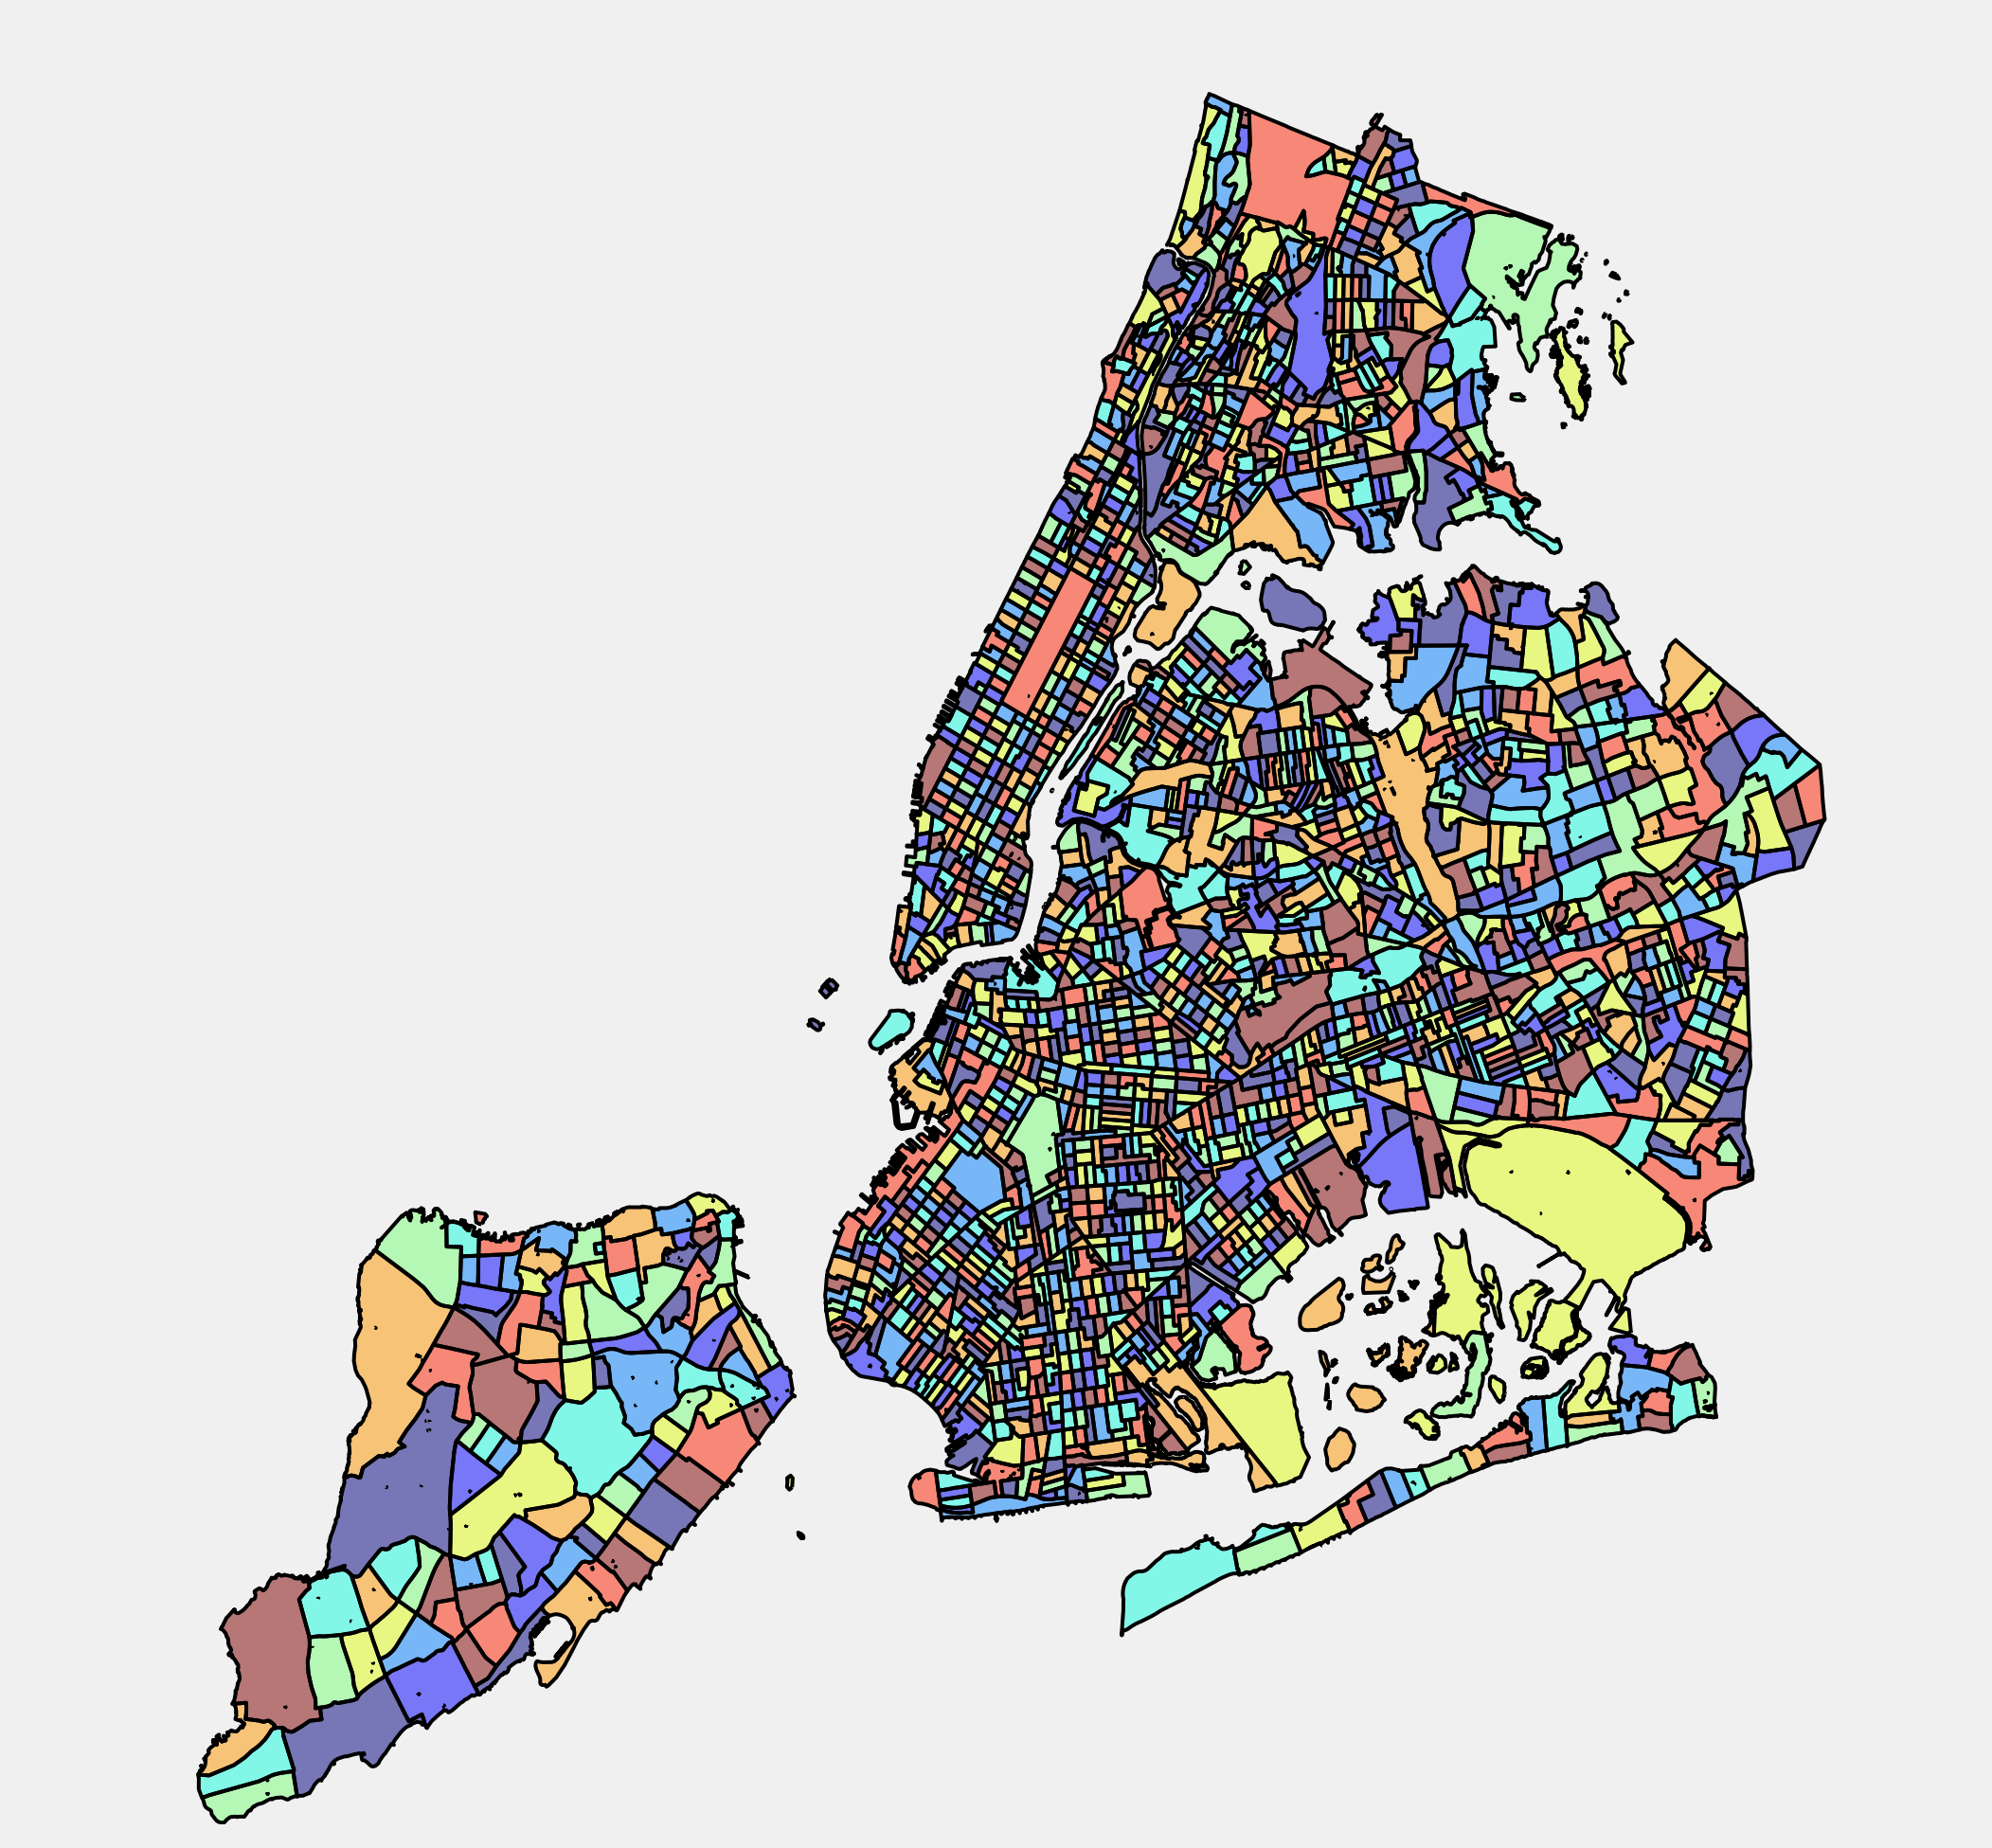

In [60]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
tracts_shp.plot(axes=ax)

In [62]:
merged_shp = tracts_shp.merge(merged, on='tract')

In [63]:
merged_shp.head(5)

geometry      tract  \
0  POLYGON ((988504.1384277344 198118.3380126953,...  061000201   
1  (POLYGON ((989149.298828125 196328.6047973633,...  061000202   
2  POLYGON ((987978.8082275391 197698.2456054688,...  061000600   
3  (POLYGON ((984943.4877929688 194173.7781982422...  061000700   
4  POLYGON ((986494.1445922852 197775.8300170898,...  061000800   

   average_commute_time  average_walk_distance  number_of_commuters   Both  \
0            573.930196             235.091885                 1934  False   
1            329.486464              94.019527                 4839  False   
2            208.393849              65.878468                 7023   True   
3            106.237555              39.465694                11189  False   
4            209.682176              95.011414                 6104   True   

  Destination? DollarVanLine Origin?  
0        False          True    True  
1        False          True    True  
2         True          True    True  
3        False         False   False  
4         True          True    True

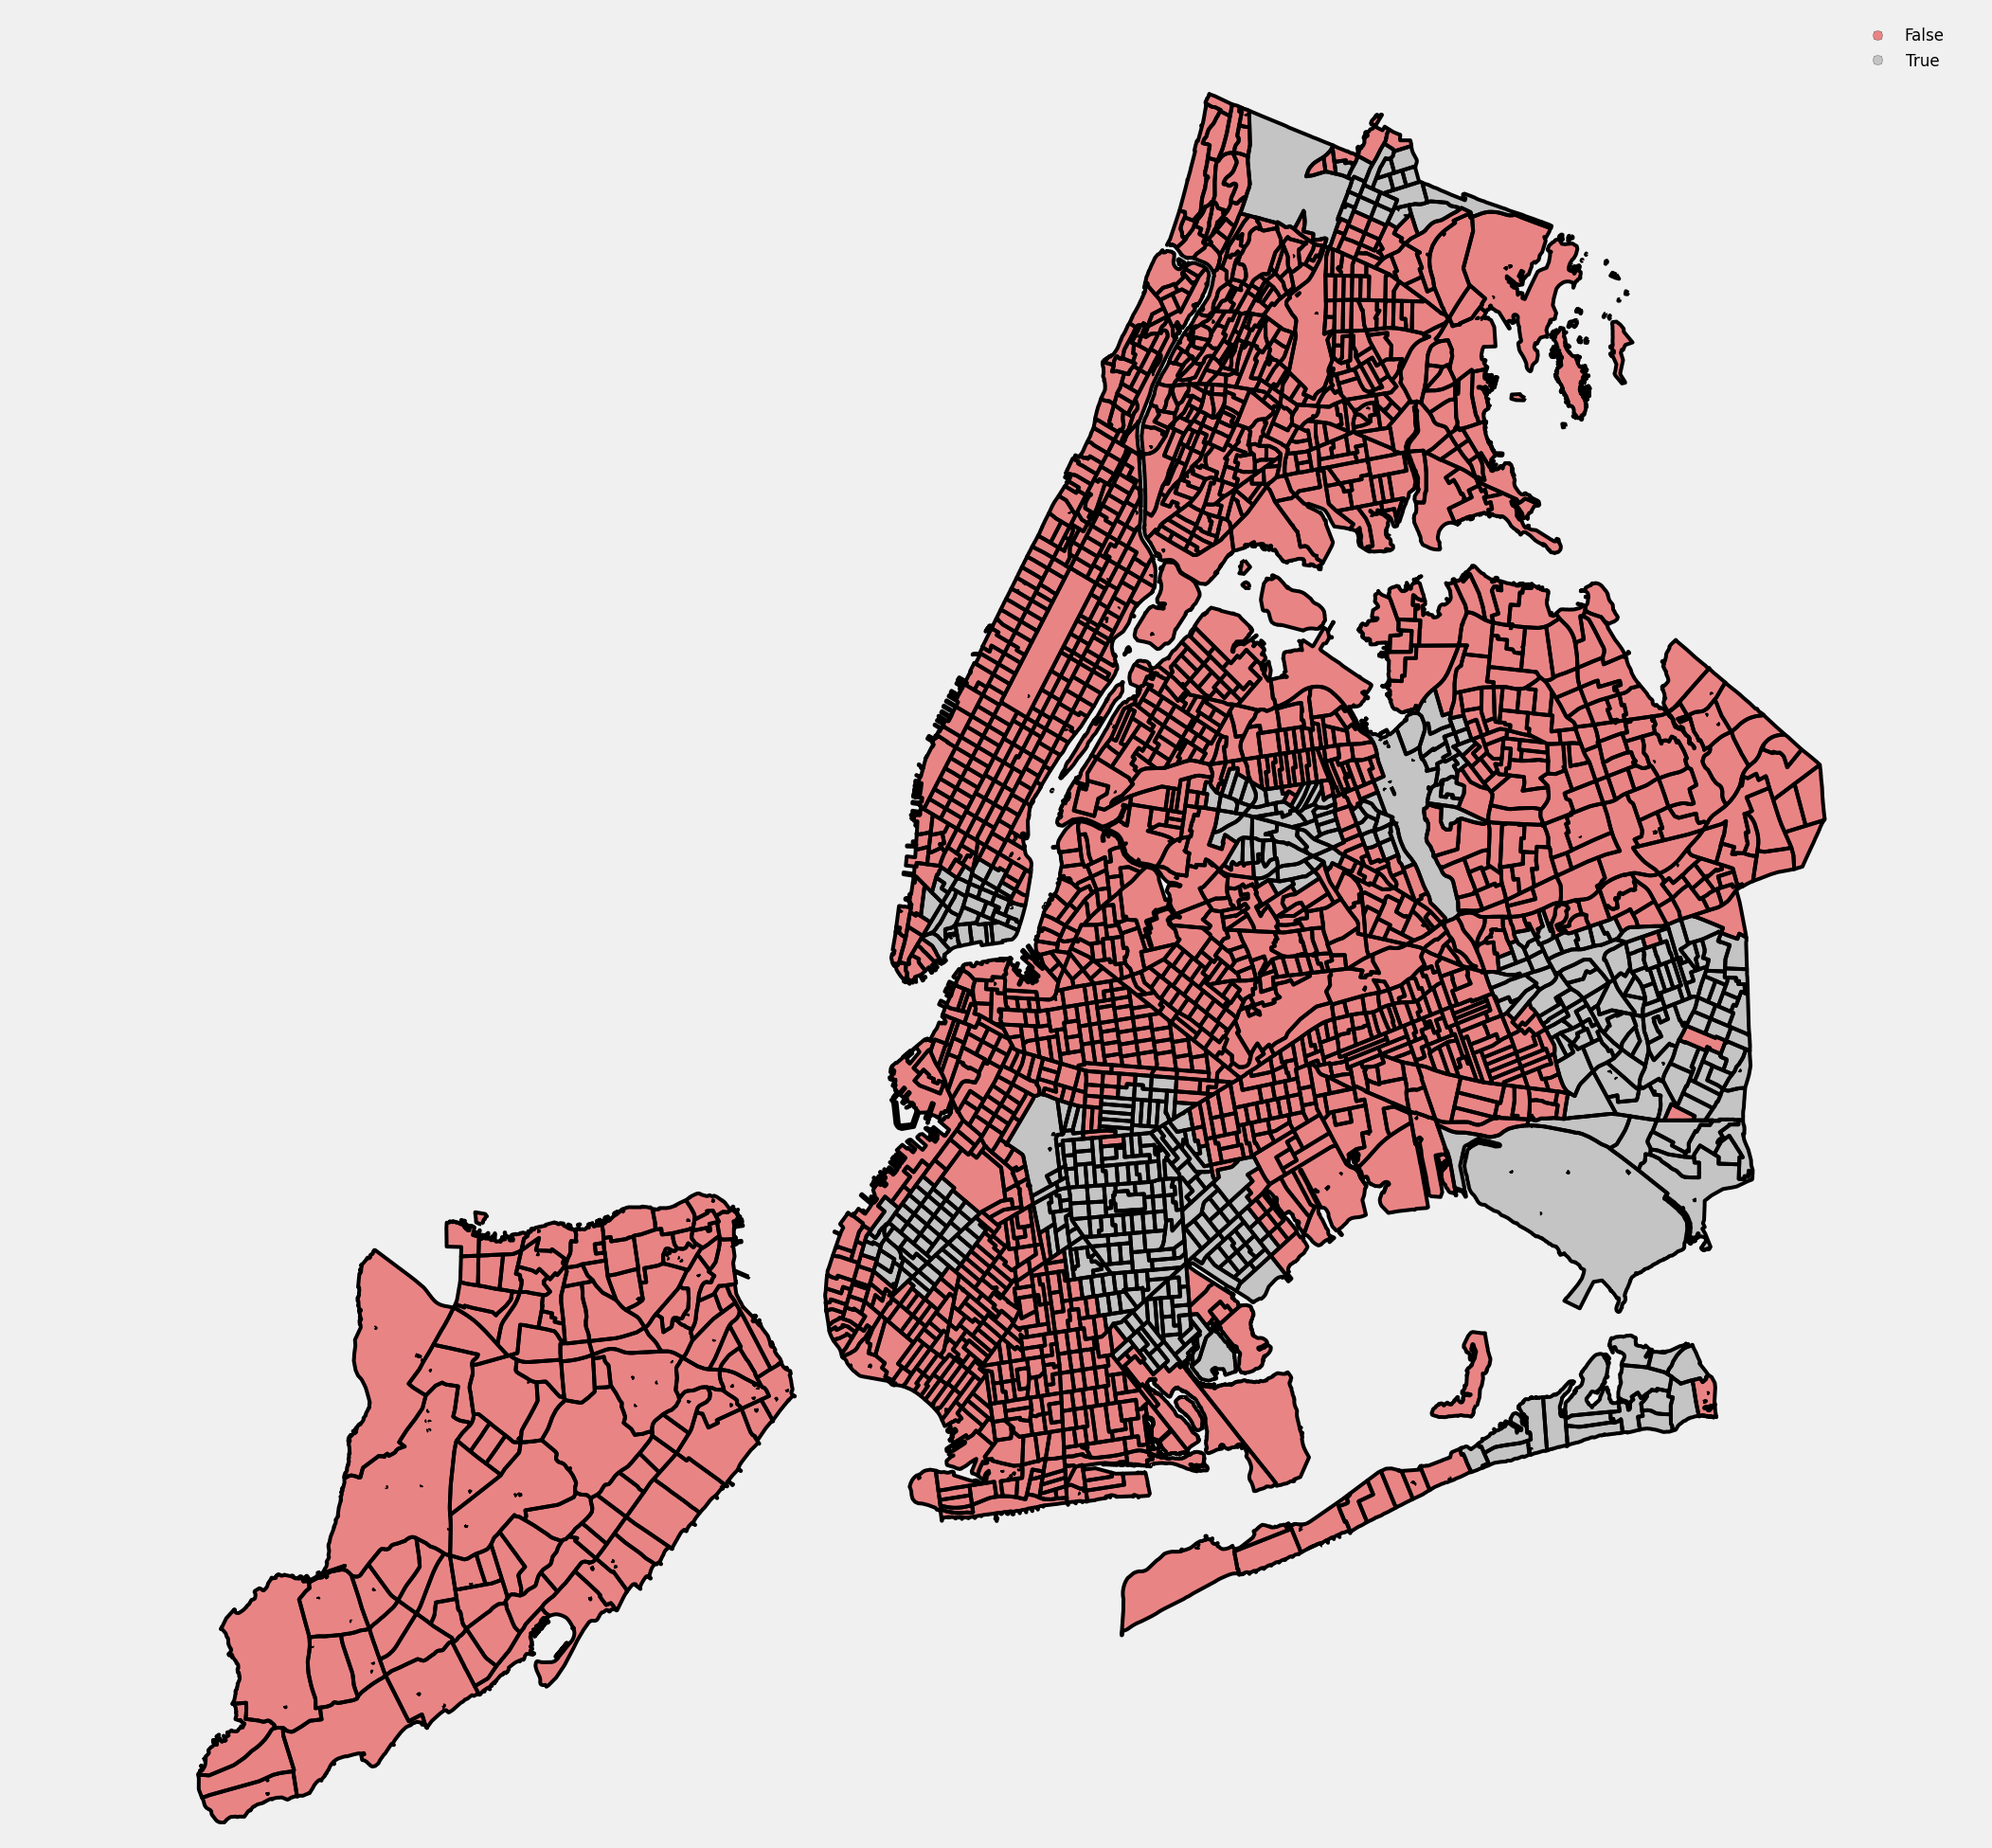

In [65]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
merged_shp.plot(axes=ax, column='Origin?', legend=True, categorical=True)

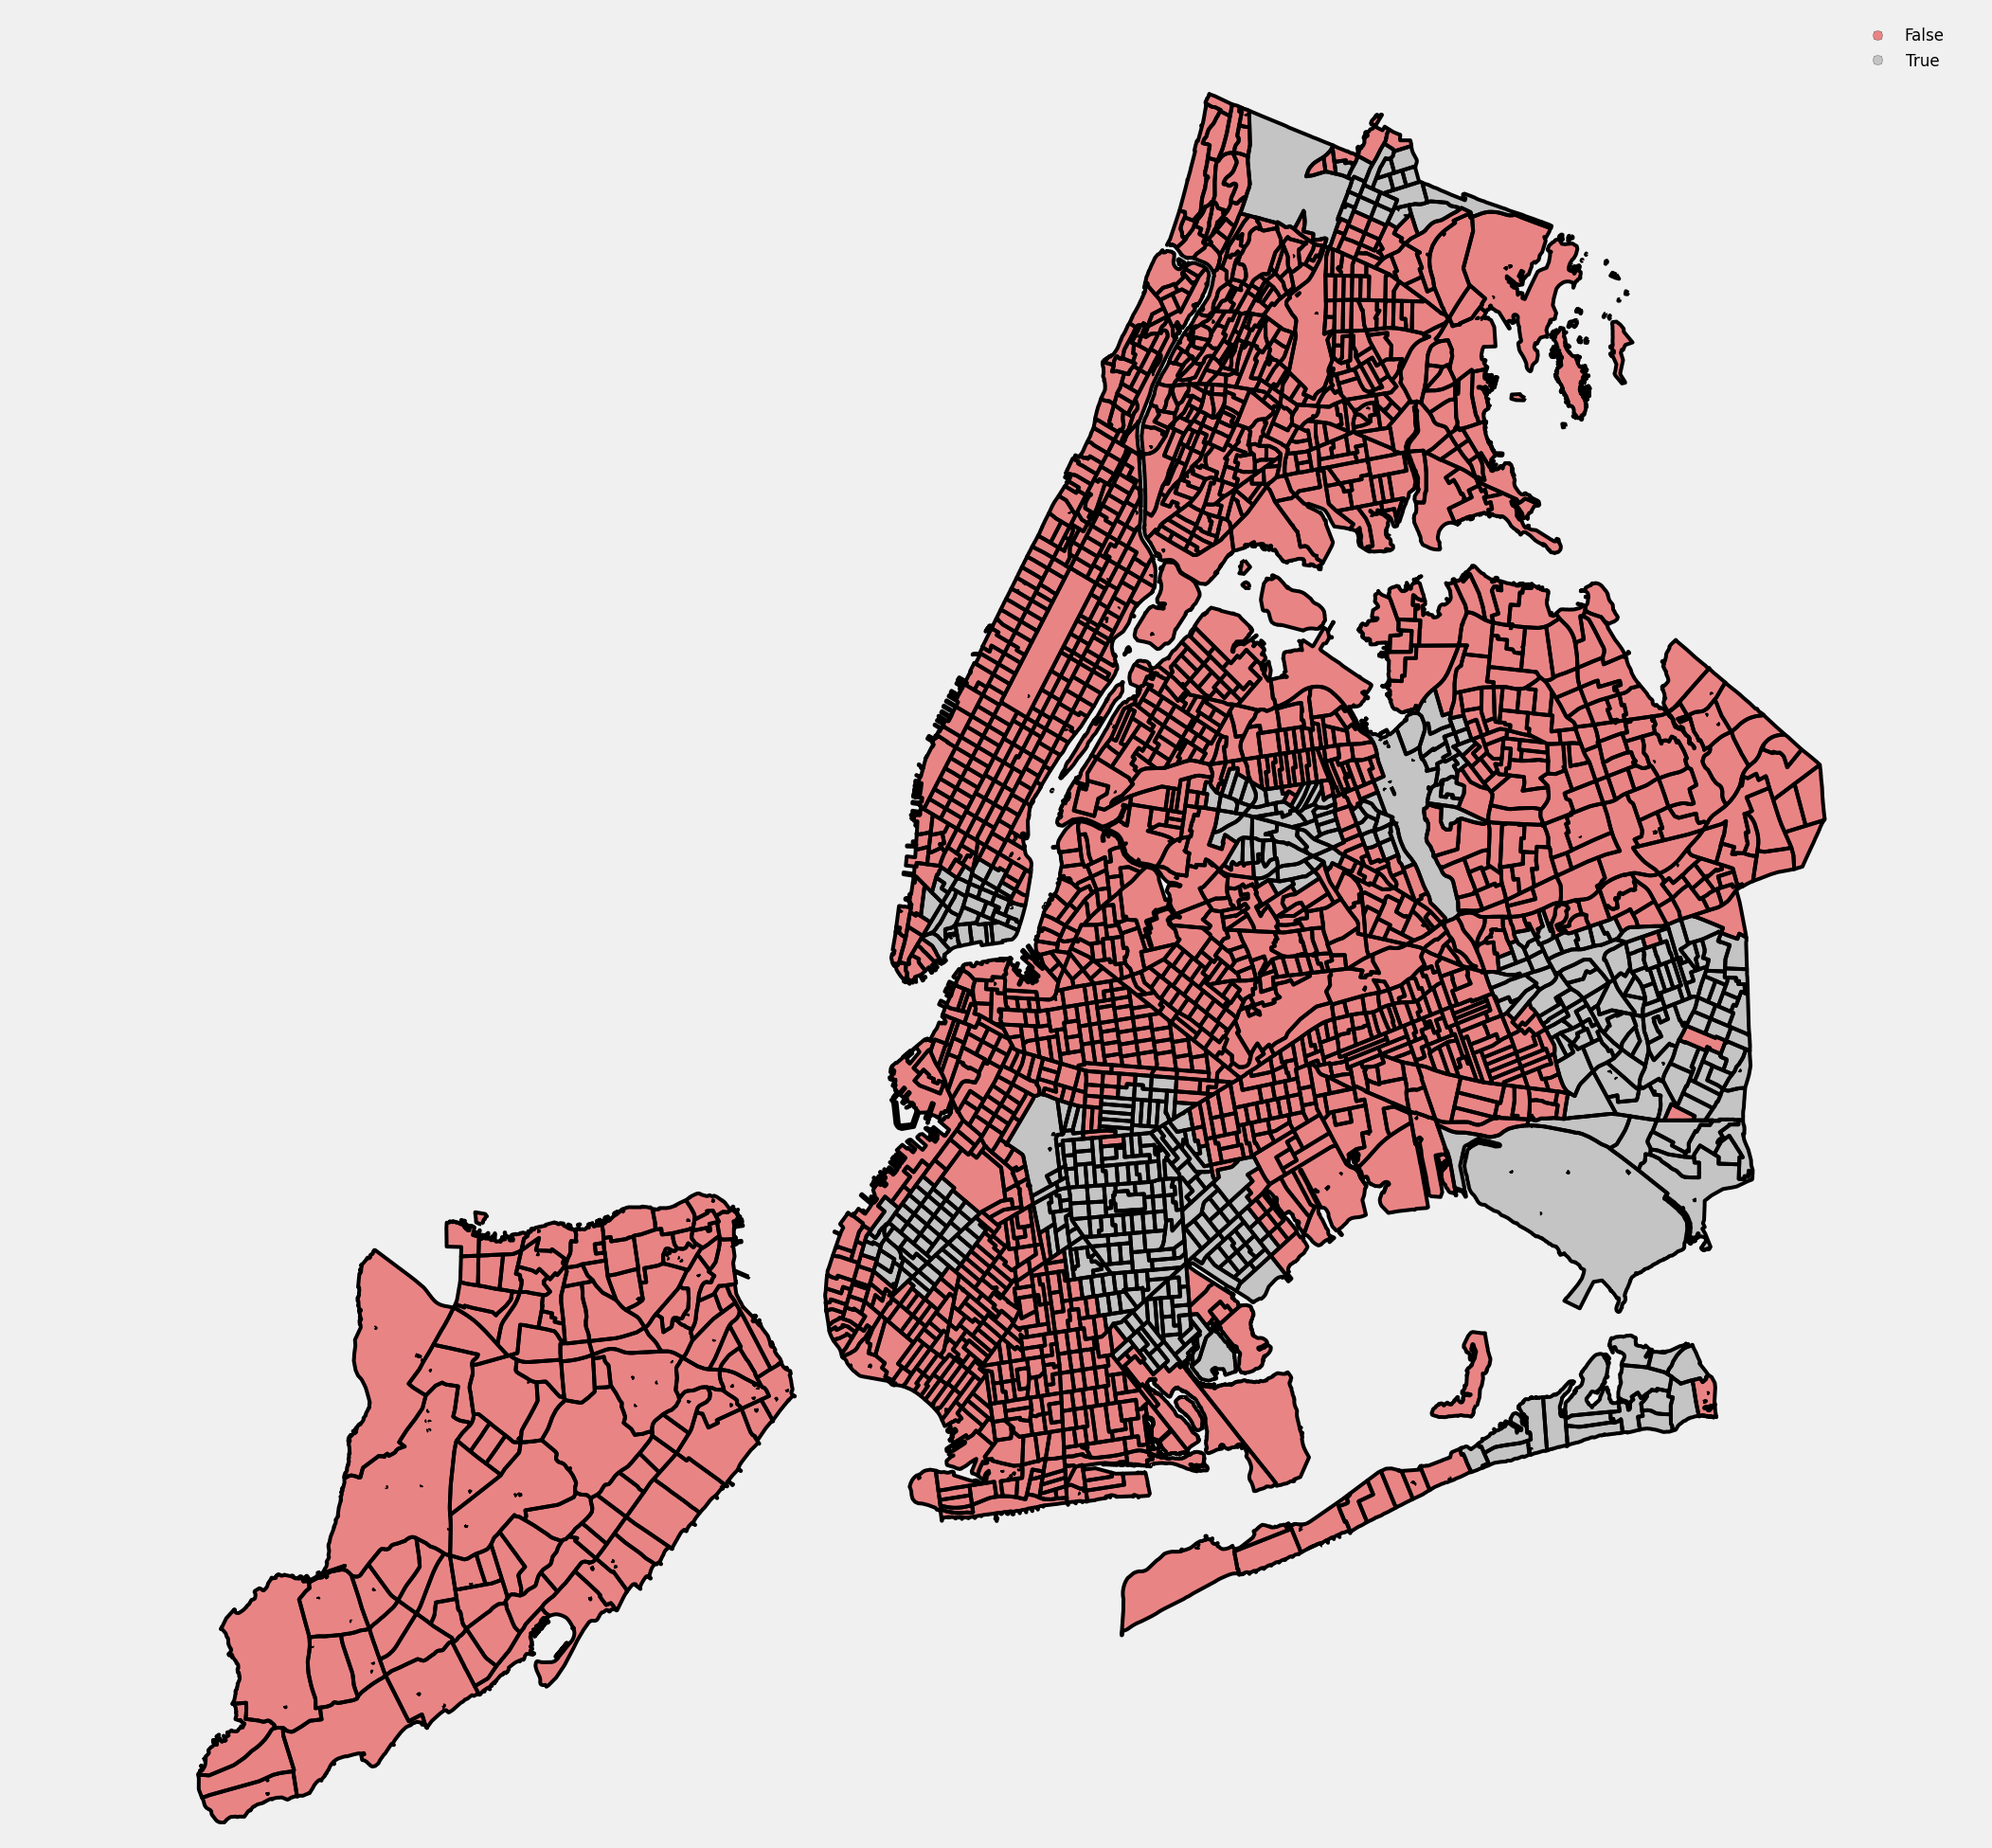

In [66]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
merged_shp.plot(axes=ax, column='DollarVanLine', legend=True, categorical=True)

In [67]:
merged_shp.describe()

average_commute_time  average_walk_distance  number_of_commuters  \
count           2160.000000            2160.000000          2160.000000   
mean            1246.229890             386.387634          1498.370370   
std              682.298608             234.711459          1957.436831   
min                0.088889               0.133333             3.000000   
25%              865.594078             260.269574           594.750000   
50%             1190.230937             350.553757           906.000000   
75%             1546.218709             468.876262          1380.250000   
max             5584.637097            2193.372956         18028.000000   

            Both Destination? DollarVanLine    Origin?  
count       2160         2160          2160       2160  
mean   0.0712963   0.09212963     0.2106481  0.2106481  
std    0.2573787    0.2892758     0.4078634  0.4078634  
min        False        False         False      False  
25%            0            0             0          0  
50%            0            0             0          0  
75%            0            0             0          0  
max         True         True          True       True

In [68]:
merged_shp[merged_shp['Origin?']].describe()

average_commute_time  average_walk_distance  number_of_commuters  \
count            455.000000             455.000000           455.000000   
mean            1417.202770             421.262679          1194.415385   
std              688.024585             228.242163          1212.520705   
min                0.088889               0.133333            45.000000   
25%              981.777871             291.362806           577.500000   
50%             1293.930841             369.599862           888.000000   
75%             1718.543338             497.740486          1399.000000   
max             5584.637097            1957.746257         10848.000000   

            Both Destination? DollarVanLine Origin?  
count        455          455           455     455  
mean   0.3384615    0.3384615             1       1  
std    0.4737072    0.4737072             0       0  
min        False        False          True    True  
25%            0            0             1       1  
50%            0            0             1       1  
75%            1            1             1       1  
max         True         True          True    True

In [69]:
merged_shp[merged_shp['Destination?']].describe()

average_commute_time  average_walk_distance  number_of_commuters  \
count            199.000000             199.000000           199.000000   
mean            1025.910543             316.935421          1910.276382   
std              586.278257             190.675334          2030.484253   
min                0.088889               0.133333            45.000000   
25%              717.828883             233.654150           793.000000   
50%              997.349536             300.640971          1105.000000   
75%             1320.657839             391.094594          1825.000000   
max             3434.037037            1375.483624         12264.000000   

            Both Destination? DollarVanLine    Origin?  
count        199          199           199        199  
mean   0.7738693            1     0.7738693  0.7738693  
std    0.4193798            0     0.4193798  0.4193798  
min        False         True         False      False  
25%            1            1             1          1  
50%            1            1             1          1  
75%            1            1             1          1  
max         True         True          True       True

In [75]:
merged_shp._geometry_column_name = 'geometry'

In [79]:
with open ('../data/merged.json', 'w') as f:
    f.write(merged_shp.to_json())